In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [12]:
df = pd.read_csv("student-mat.csv", sep=';')
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [13]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [14]:
df.isnull().sum()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [15]:
df['pass_fail'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)
df['pass_fail'].value_counts()


pass_fail
1    265
0    130
Name: count, dtype: int64

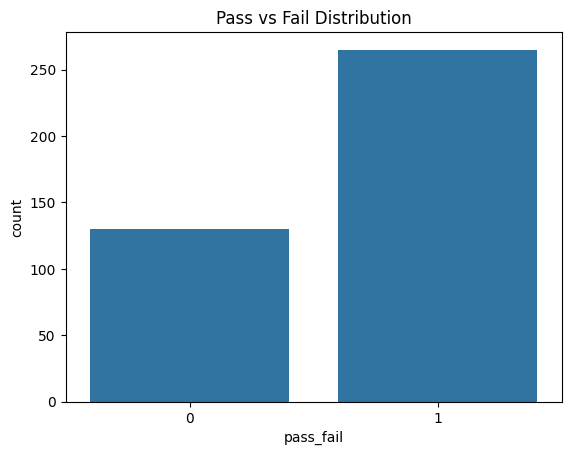

In [16]:
sns.countplot(x='pass_fail', data=df)
plt.title("Pass vs Fail Distribution")
plt.show()


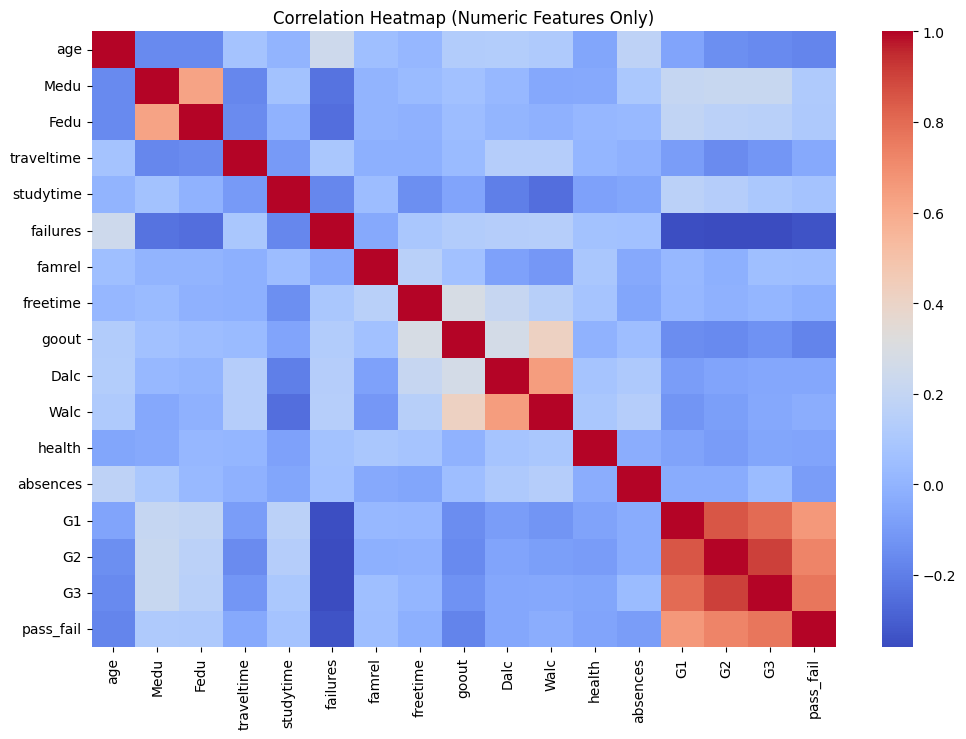

In [23]:
plt.figure(figsize=(12,8))

numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)

plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [24]:
df.drop('G3', axis=1, inplace=True)


In [25]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [47]:
selected_features = [
    'studytime',
    'failures',
    'absences',
    'goout',
    'freetime',
    'health',
    'G1',
    'G2'
]

X = df[selected_features]
y = df['pass_fail']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [48]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [49]:
print("Decision Tree Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))


Decision Tree Performance
Accuracy: 0.8860759493670886
Precision: 0.9782608695652174
Recall: 0.8490566037735849
F1 Score: 0.9090909090909092


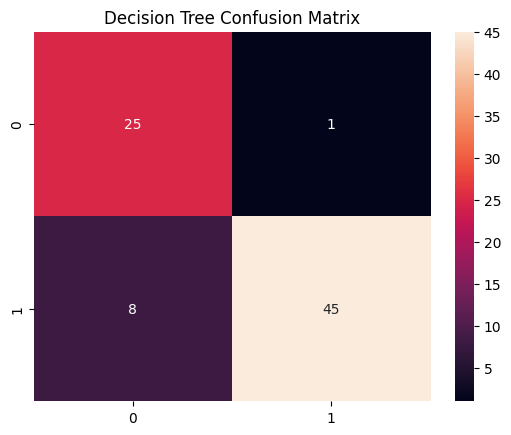

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.show()


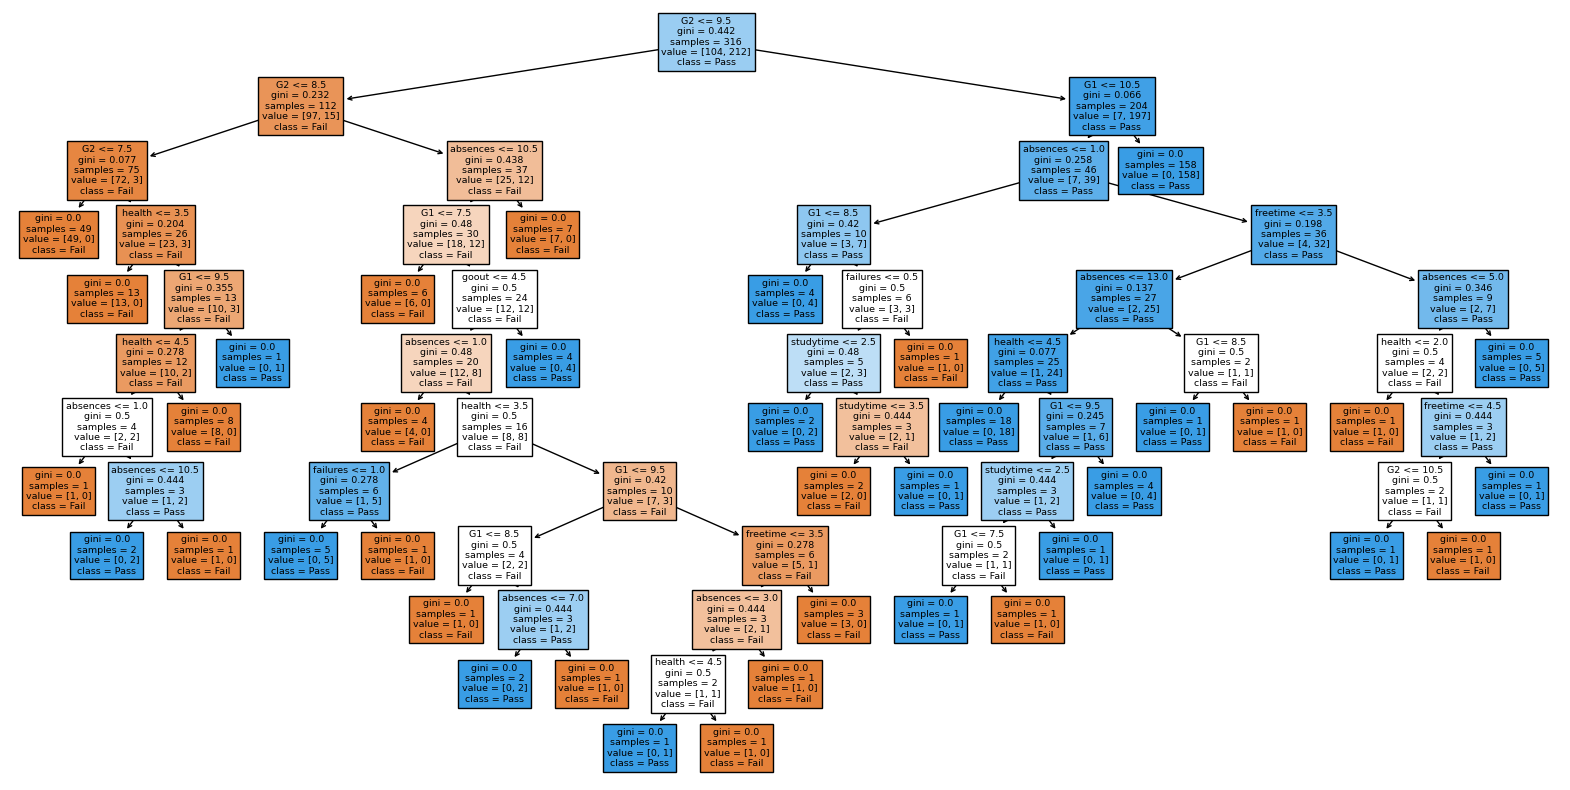

In [51]:
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["Fail", "Pass"], filled=True)
plt.show()


In [52]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [53]:
print("Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


Random Forest Performance
Accuracy: 0.8860759493670886
Precision: 0.9782608695652174
Recall: 0.8490566037735849
F1 Score: 0.9090909090909092


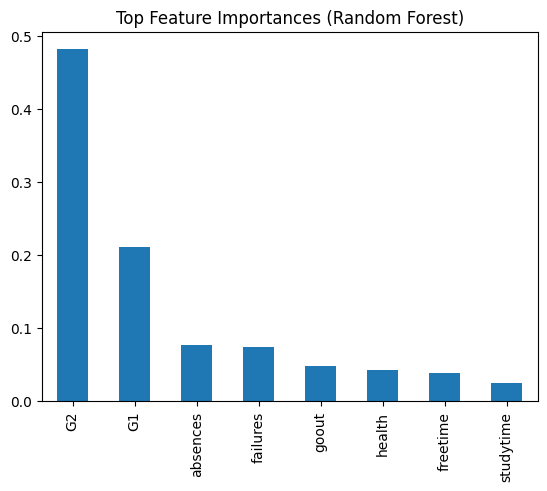

In [54]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top Feature Importances (Random Forest)")
plt.show()


In [55]:
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1'
)

grid.fit(X_train, y_train)
grid.best_params_


{'max_depth': 5, 'min_samples_split': 10}

In [56]:
import joblib

joblib.dump(rf, "student_performance_model.pkl")
joblib.dump(X.columns.tolist(), "feature_columns.pkl")


['feature_columns.pkl']

In [57]:
pip install gradio


In [58]:
import gradio as gr
import joblib
import numpy as np
import pandas as pd

# Load trained model and feature columns
model = joblib.load("student_performance_model.pkl")
feature_columns = joblib.load("feature_columns.pkl")

def predict_performance(
    studytime,
    failures,
    absences,
    goout,
    freetime,
    health,
    G1,
    G2
):
    # Input must match training order
    input_data = pd.DataFrame([[
        studytime,
        failures,
        absences,
        goout,
        freetime,
        health,
        G1,
        G2
    ]], columns=feature_columns)

    prediction = model.predict(input_data)[0]

    return "✅ PASS" if prediction == 1 else "❌ FAIL"


In [59]:
interface = gr.Interface(
    fn=predict_performance,
    inputs=[
        gr.Slider(1, 4, step=1, label="Study Time (1–4)"),
        gr.Slider(0, 4, step=1, label="Past Failures"),
        gr.Slider(0, 100, step=1, label="Absences"),
        gr.Slider(1, 5, step=1, label="Going Out Frequency"),
        gr.Slider(1, 5, step=1, label="Free Time"),
        gr.Slider(1, 5, step=1, label="Health Status"),
        gr.Slider(0, 20, step=1, label="Grade G1"),
        gr.Slider(0, 20, step=1, label="Grade G2")
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="🎓 Student Performance Prediction",
    description="Predict whether a student will PASS or FAIL using a Random Forest model."
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


Created dataset file at: .gradio\flagged\dataset1.csv
